In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math as mt
from math import sqrt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv("C:/Users/akhilesh rai/Downloads/Dentistry Dataset.csv")

In [3]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [5]:
df = df.drop(['Sample ID','Sl No'],axis =1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(1077, 12)

In [9]:
Label_Encoder = LabelEncoder()

In [10]:
df['Gender']= Label_Encoder.fit_transform(df['Gender'])

In [11]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [12]:
df['Gender'].unique()

array([0, 1])

In [13]:
df.loc[df['Gender'] == 'Male']

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1077 non-null   int64  
 1   Gender                           1077 non-null   int32  
 2   inter canine distance intraoral  1077 non-null   float64
 3   intercanine distance casts       1077 non-null   float64
 4   right canine width intraoral     1077 non-null   float64
 5   right canine width casts         1077 non-null   float64
 6   left canine width intraoral      1077 non-null   float64
 7   left canine width casts          1077 non-null   float64
 8   right canine index intra oral    1077 non-null   float64
 9   right canine index casts         1077 non-null   float64
 10  left canine index intraoral      1077 non-null   float64
 11  left canine index casts          1077 non-null   float64
dtypes: float64(10), int3

In [15]:
df.shape

(1077, 12)

In [16]:
df.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21.62117,0.501393,25.981188,25.869842,6.560149,6.561671,6.667604,6.673120,0.253104,0.252319,0.256456,0.256362
std,2.07289,0.500230,1.309747,1.867892,0.378103,0.376608,0.375512,0.376803,0.015395,0.012894,0.012358,0.012374
min,18.00000,0.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.00000,0.000000,24.990000,24.970000,6.290000,6.300000,6.400000,6.400000,0.242000,0.242000,0.247000,0.247000
50%,22.00000,1.000000,25.890000,25.890000,6.520000,6.520000,6.660000,6.670000,0.253000,0.253000,0.255000,0.255000
75%,23.00000,1.000000,26.980000,26.980000,6.800000,6.800000,6.900000,6.920000,0.262000,0.261000,0.264000,0.264000
max,25.00000,1.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [17]:
df_pi = df.copy()
df_pi[" "] = np.where(df_pi['Gender'] == 1 ,  "Male", "Female")

<AxesSubplot:ylabel=' '>

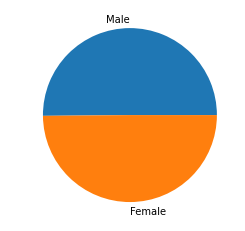

In [18]:
df_pi[" "].value_counts().plot(kind="pie")

In [19]:
print("Male: " + str(len(df[df['Gender'] == 1])))
print("Female: " + str(len(df[df['Gender'] == 0])))

Male: 540
Female: 537


In [20]:
df_1 = df.copy()

In [21]:
x = df_1.drop("Gender",axis = 1)
y= df_1["Gender"]
bestfeatures = SelectKBest(score_func = chi2,k=7)
fit =bestfeatures.fit(x,y)

In [22]:
feature_scores = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(fit.scores_)],axis = 1)
feature_scores.columns = ["fetaures","scores"]
feature_scores.sort_values(by = 'scores',ascending = False)

,fetaures,scores
6,left canine width casts,9.288489
5,left canine width intraoral,8.943845
1,inter canine distance intraoral,8.051697
3,right canine width intraoral,7.284305
4,right canine width casts,7.228491
2,intercanine distance casts,4.463575
0,Age,3.298344
10,left canine index casts,0.096843
9,left canine index intraoral,0.095045
8,right canine index casts,0.063348


In [23]:
feature_scores.nlargest(5,'scores')

,fetaures,scores
6,left canine width casts,9.288489
5,left canine width intraoral,8.943845
1,inter canine distance intraoral,8.051697
3,right canine width intraoral,7.284305
4,right canine width casts,7.228491


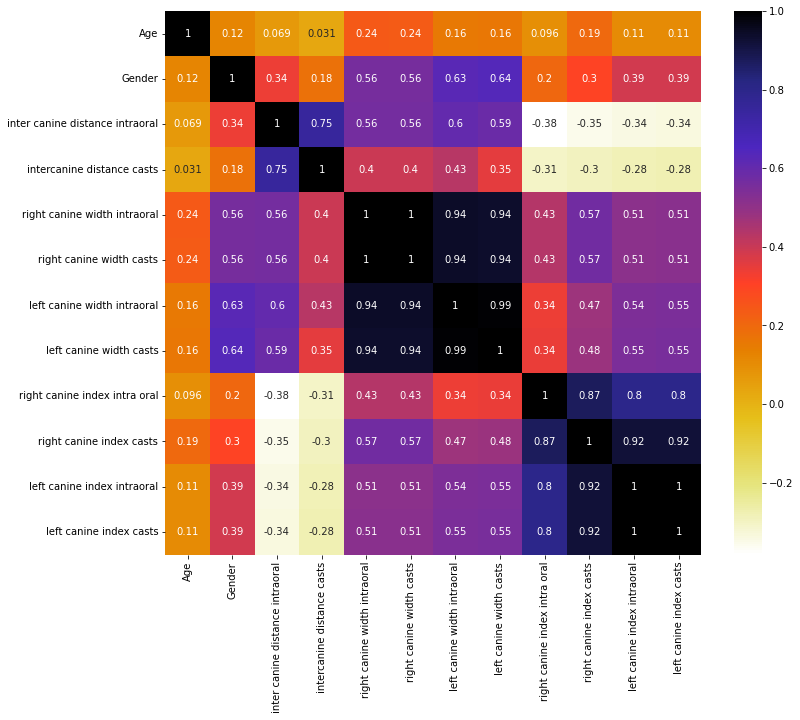

In [24]:
plt.figure(figsize = (12,10))
sns.heatmap(df_1.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhilesh rai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

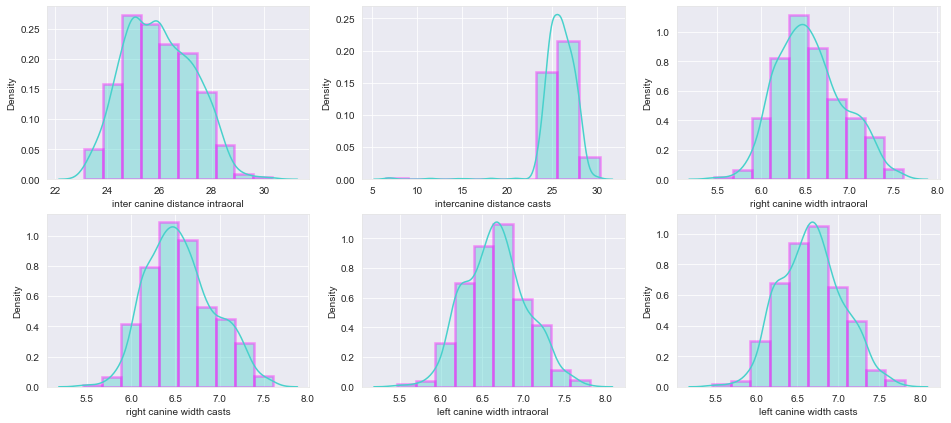

In [25]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(2,3,figsize = (16,7))
plt.rcParams["patch.force_edgecolor"] = True
vis1 = sns.distplot(df["inter canine distance intraoral"],bins=10,color='mediumturquoise',
hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax= ax[0][0])
vis2 = sns.distplot(df["intercanine distance casts"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta",linewidth=2.5),ax=ax[0][1])
vis3 = sns.distplot(df["right canine width intraoral"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[0][2])
vis4 = sns.distplot(df["right canine width casts"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5), ax=ax[1][0])
vis5 =sns.distplot(df["left canine width intraoral"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[1][1])
vis6 =sns.distplot(df["left canine width casts"],bins=10,color='mediumturquoise', hist_kws=dict(edgecolor="magenta", linewidth=2.5),ax=ax[1][2])

In [26]:
df_1.shape

(1077, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'inter canine distance intraoral'),
  Text(3, 0, 'intercanine distance casts'),
  Text(4, 0, 'right canine width intraoral'),
  Text(5, 0, 'right canine width casts'),
  Text(6, 0, 'left canine width intraoral'),
  Text(7, 0, 'left canine width casts'),
  Text(8, 0, 'right canine index intra oral'),
  Text(9, 0, 'right canine index casts'),
  Text(10, 0, 'left canine index intraoral'),
  Text(11, 0, 'left canine index casts')])

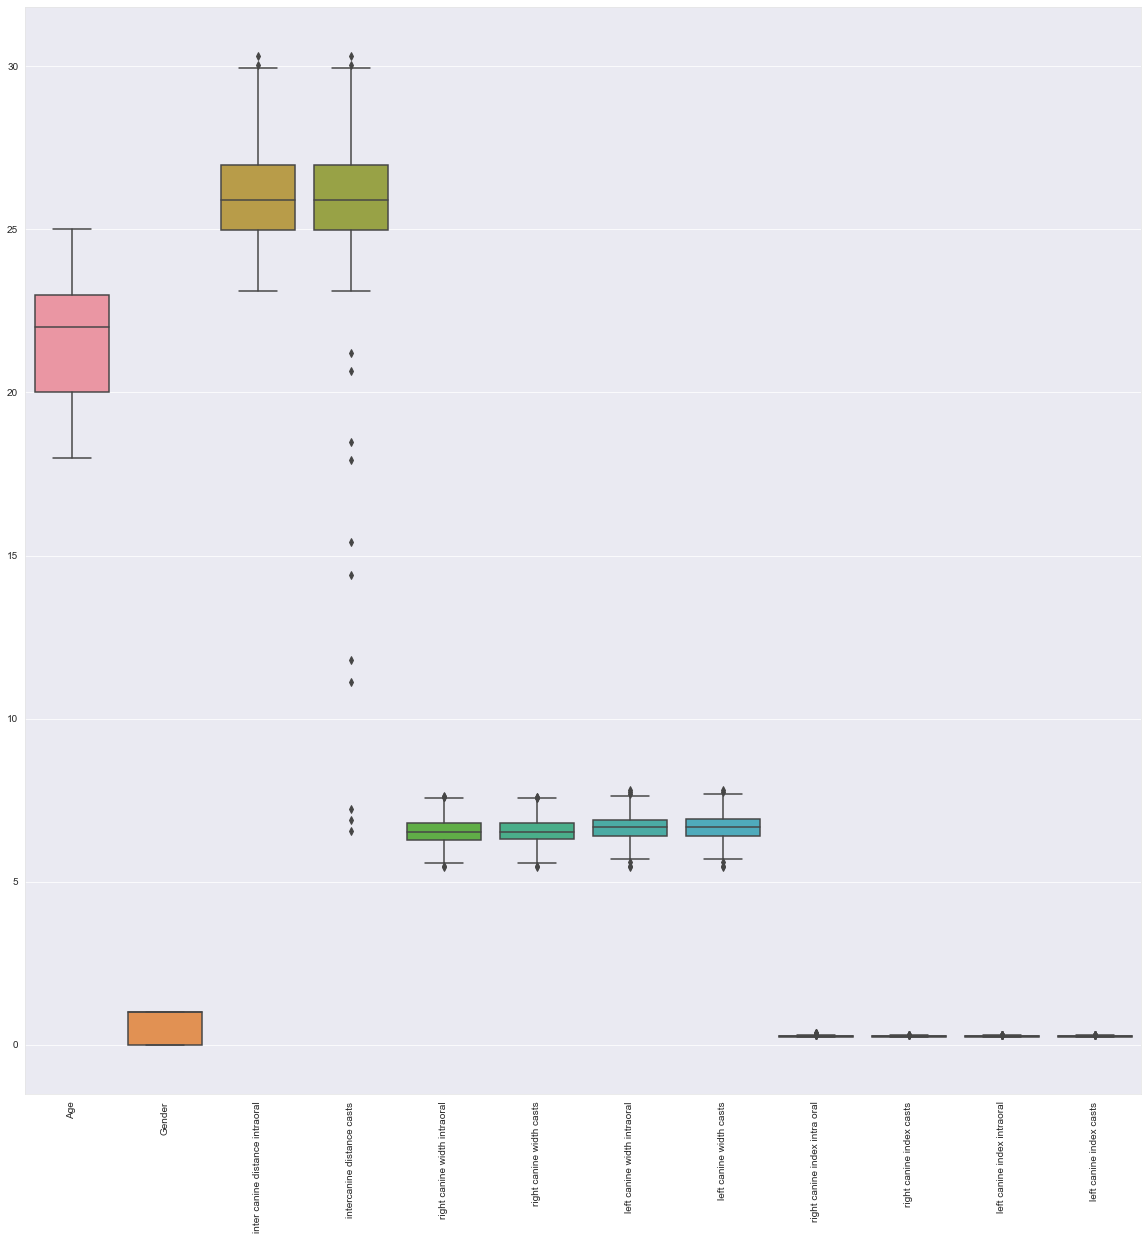

In [27]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=df_1)
plt.xticks(rotation=90)

In [28]:
df_1.quantile([.25,.5,.75],axis = 0)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0.25,20.0,0.0,24.99,24.97,6.29,6.30,6.40,6.40,0.242,0.242,0.247,0.247
0.50,22.0,1.0,25.89,25.89,6.52,6.52,6.66,6.67,0.253,0.253,0.255,0.255
0.75,23.0,1.0,26.98,26.98,6.80,6.80,6.90,6.92,0.262,0.261,0.264,0.264


In [29]:
df_1.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21.62117,0.501393,25.981188,25.869842,6.560149,6.561671,6.667604,6.673120,0.253104,0.252319,0.256456,0.256362
std,2.07289,0.500230,1.309747,1.867892,0.378103,0.376608,0.375512,0.376803,0.015395,0.012894,0.012358,0.012374
min,18.00000,0.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.00000,0.000000,24.990000,24.970000,6.290000,6.300000,6.400000,6.400000,0.242000,0.242000,0.247000,0.247000
50%,22.00000,1.000000,25.890000,25.890000,6.520000,6.520000,6.660000,6.670000,0.253000,0.253000,0.255000,0.255000
75%,23.00000,1.000000,26.980000,26.980000,6.800000,6.800000,6.900000,6.920000,0.262000,0.261000,0.264000,0.264000
max,25.00000,1.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [30]:
column = df_1.columns

In [31]:
column

Index(['Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine width casts', 'left canine width intraoral',
       'left canine width casts', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral',
       'left canine index casts'],
      dtype='object')

In [32]:
IQR = df_1['inter canine distance intraoral'].quantile(0.75) - df_1['inter canine distance intraoral'].quantile(0.25)
Upper_Limit = df_1['inter canine distance intraoral'].quantile(0.75) + 1.5 * IQR
Lower_Limit = df_1['inter canine distance intraoral'].quantile(0.25) - 1.5 * IQR

In [33]:
print('IQR is:',IQR)

IQR is: 1.990000000000002


In [34]:
print('Upper Limit is:',Upper_Limit)

Upper Limit is: 29.965000000000003


In [35]:
print('Lower Limit is:',Lower_Limit)

Lower Limit is: 22.004999999999995


In [36]:
df_2 = df_1['inter canine distance intraoral']

In [37]:
outlier = []
for x in df_2:
    if (x>Upper_Limit) or (x<Lower_Limit):
        outlier.append(x)

In [38]:
print(outlier)

[30.31, 30.03]


In [39]:
def outliers(df,field):
    IQR = df[field].quantile(0.75) - df[field].quantile(0.25)
    Upper_Limit = df[field].quantile(0.65) + 1.5 * IQR
    Lower_Limit = df[field].quantile(0.25) - 1.5 * IQR
    ls = df.index[(df[field]<Lower_Limit) | (df[field]>Upper_Limit)]
    return ls

index_list = []

for feature in column:
    index_list.extend(outliers(df_1,feature))

In [40]:
index_list

[66,
 760,
 762,
 66,
 90,
 760,
 762,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 45,
 54,
 61,
 559,
 691,
 700,
 705,
 710,
 712,
 715,
 717,
 731,
 736,
 767,
 45,
 54,
 61,
 559,
 691,
 700,
 705,
 710,
 712,
 715,
 717,
 731,
 736,
 767,
 45,
 54,
 61,
 550,
 559,
 640,
 641,
 644,
 645,
 649,
 666,
 691,
 700,
 710,
 712,
 715,
 717,
 731,
 45,
 54,
 61,
 550,
 559,
 641,
 644,
 645,
 649,
 666,
 691,
 700,
 715,
 717,
 731,
 34,
 57,
 422,
 423,
 428,
 441,
 442,
 444,
 446,
 447,
 485,
 613,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 57,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 57,
 62,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 721,
 723,
 724,
 725,
 728,
 729,
 739,
 57,
 62,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 721,
 723,
 724,
 725,
 728,
 729,
 739]

In [41]:
def remove_outliers(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [42]:
df_1 = remove_outliers(df_1,index_list)

In [43]:
df_1.shape

(1014, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'inter canine distance intraoral'),
  Text(3, 0, 'intercanine distance casts'),
  Text(4, 0, 'right canine width intraoral'),
  Text(5, 0, 'right canine width casts'),
  Text(6, 0, 'left canine width intraoral'),
  Text(7, 0, 'left canine width casts'),
  Text(8, 0, 'right canine index intra oral'),
  Text(9, 0, 'right canine index casts'),
  Text(10, 0, 'left canine index intraoral'),
  Text(11, 0, 'left canine index casts')])

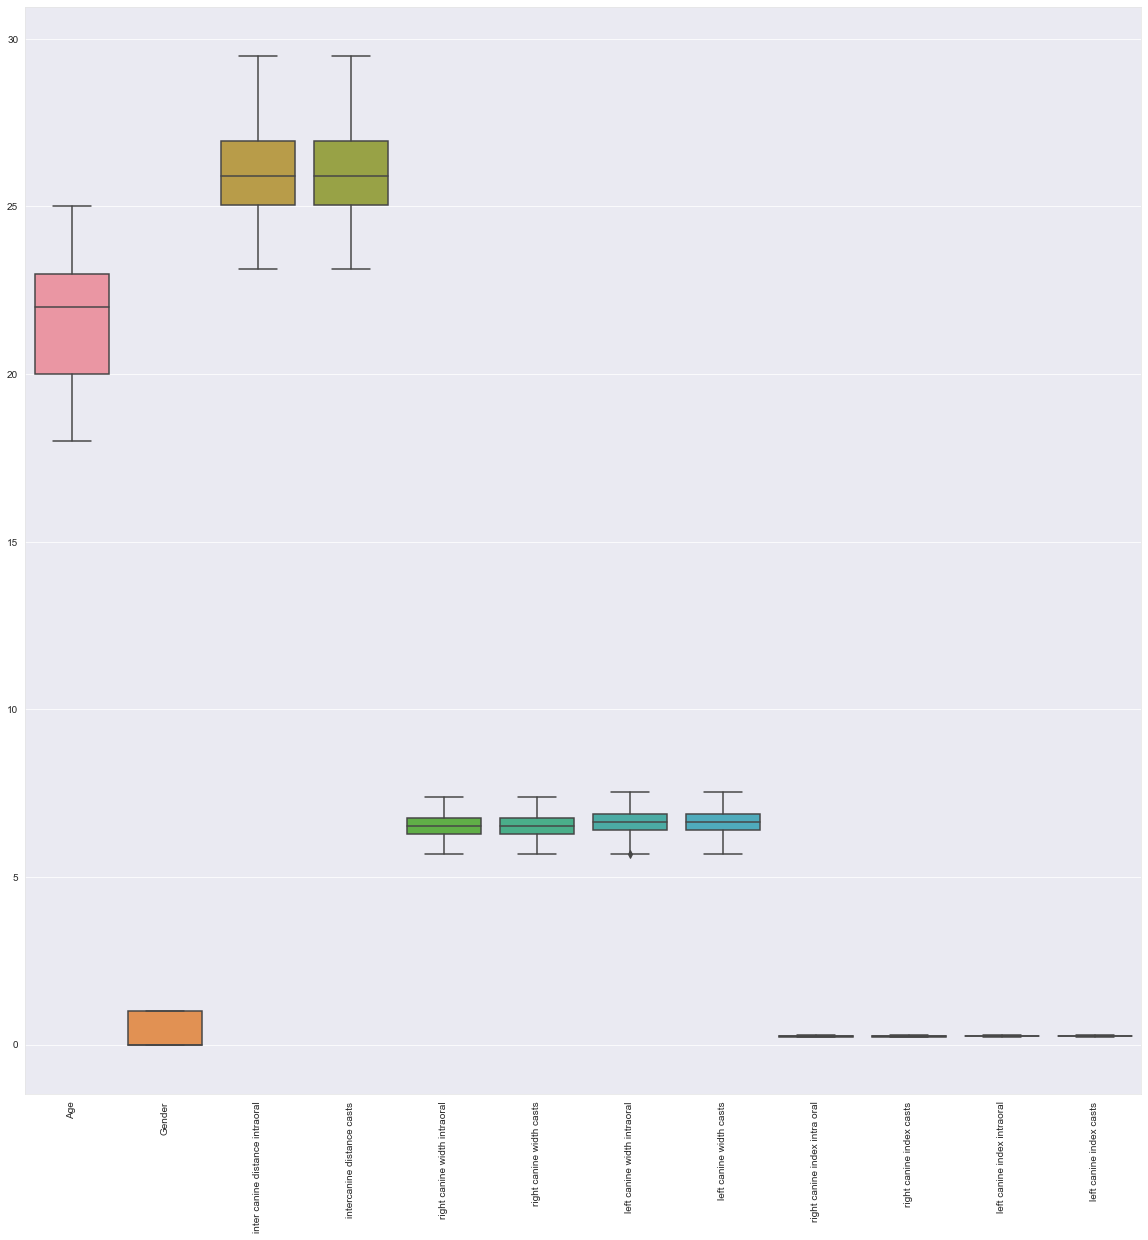

In [44]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=df_1)
plt.xticks(rotation=90)

In [45]:
X = df_1.drop('Gender', axis = 1)
Y = df_1['Gender']

In [46]:
X.shape

(1014, 11)

In [47]:
Y.shape

(1014,)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.8,stratify=Y,random_state = 12345)

In [50]:
X_train.shape

(811, 11)

In [51]:
X_test.shape

(203, 11)

In [52]:
Y_train.shape

(811,)

In [53]:
Y_test.shape

(203,)

In [54]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\akhilesh rai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


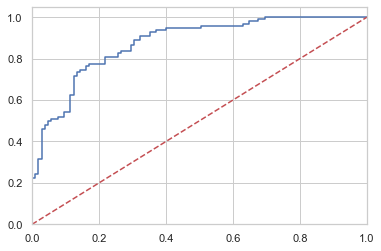

0.7972789115646257

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
logit_roc_auc

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [57]:
knn = KNeighborsClassifier(n_neighbors=8,metric='euclidean')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [58]:
import warnings
warnings.filterwarnings("ignore")
b=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    a=accuracy_score(Y_test,Y_pred)
    print(f"Accuracy when k={i} = {a}")
    b.append(accuracy_score(Y_test,Y_pred))
print(max(b)) 

Accuracy when k=1 = 0.9014778325123153
Accuracy when k=2 = 0.8669950738916257
Accuracy when k=3 = 0.8768472906403941
Accuracy when k=4 = 0.8472906403940886
Accuracy when k=5 = 0.8423645320197044
Accuracy when k=6 = 0.8029556650246306
Accuracy when k=7 = 0.8275862068965517
Accuracy when k=8 = 0.812807881773399
Accuracy when k=9 = 0.812807881773399
0.9014778325123153


Feature: 0, Score: 0.12702169625246548
Feature: 1, Score: 0.09861932938856018
Feature: 2, Score: 0.09763313609467457
Feature: 3, Score: 0.036489151873767264
Feature: 4, Score: 0.03471400394477318
Feature: 5, Score: 0.040039447731755454
Feature: 6, Score: 0.042209072978303765
Feature: 7, Score: 0.0
Feature: 8, Score: 0.0
Feature: 9, Score: 0.0
Feature: 10, Score: 0.0


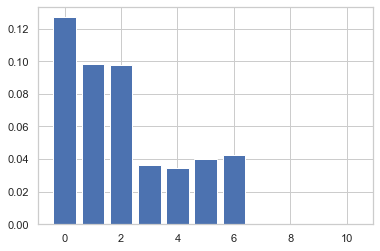

In [59]:
from sklearn.inspection import permutation_importance
results = permutation_importance(knn, X, Y, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [60]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:
rc = RidgeClassifier()
print(rc)

rc.fit(X_train, Y_train)
score = rc.score(X_train, Y_train)
print("Score: ", score)

cv_scores = cross_val_score(rc, X_train, Y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

Y_pred = rc.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

cr = classification_report(Y_test, Y_pred)
print(cr) 
 

RidgeClassifier()
Score:  0.8076448828606658
CV average score: 0.80
[[84 21]
 [22 76]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.78      0.78      0.78        98

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203



In [62]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test) 

In [63]:
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))

0.39553884539652817


In [64]:
print(r2_score(Y_train, pred_train_lasso))

0.3735016935106038


In [65]:
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso)))

0.3867933706463935


In [66]:
print(r2_score(Y_test, pred_test_lasso))

0.4008511293551682


In [67]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [69]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
Y_pred = XGB.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [71]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.85%


In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6149253731343284


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [75]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ADA = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = ADA.predict(X_test)

In [76]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7377049180327869


In [77]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=109)

In [78]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [79]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8262295081967214


In [80]:
print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Precision: 0.8287671232876712
Recall: 0.8120805369127517


In [82]:
from sklearn.ensemble import RandomForestClassifier
naive_rfc = RandomForestClassifier()
naive_rfc.fit(X_train, Y_train)
naive_test_preds = naive_rfc.predict(X_test)

In [84]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [85]:
print("The accuracy is {}".format(accuracy_score(Y_test, naive_test_preds)))
print("The precision is {}".format(precision_score(Y_test, naive_test_preds)))
print("The recall is {}".format(recall_score(Y_test, naive_test_preds)))

The accuracy is 0.898360655737705
The precision is 0.8734177215189873
The recall is 0.9261744966442953


In [86]:
from sklearn.model_selection import GridSearchCV

In [93]:
def print_results(results):
    print('Best Param:{}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for means,stds,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{} for {})'.format(round(means,3),round(stds*2,3),params))

In [94]:
rf = RandomForestClassifier(oob_score = True)
parameters = {'n_estimators':[50,100,300,400],}
cv = GridSearchCV(rf,parameters,cv=11)
cv.fit(X_train, Y_train.values.ravel())
print_results(cv)

Best Param:{'n_estimators': 400}

0.89(+/-0.063 for {'n_estimators': 50})
0.9(+/-0.038 for {'n_estimators': 100})
0.901(+/-0.046 for {'n_estimators': 300})
0.903(+/-0.05 for {'n_estimators': 400})


In [98]:
cv.score(X_test,Y_test)

0.9016393442622951

In [99]:
cv.score(X_train,Y_train)

1.0

In [100]:
cv

GridSearchCV(cv=11, estimator=RandomForestClassifier(oob_score=True),
             param_grid={'n_estimators': [50, 100, 300, 400]})

In [101]:
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=400)

In [102]:
print("Train Accuracy :",rf.score(X_train, Y_train))
print("Test Accuracy :",rf.score(X_test, Y_test))

Train Accuracy : 1.0
Test Accuracy : 0.8918032786885246


In [103]:
y_pred_test = rf.predict(X_test)

In [105]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       156
           1       0.83      0.81      0.82       149

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.83      0.83      0.83       305

